In [62]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='a46c7360-91b7-4276-ad14-c8b826575126', project_access_token='p-859d7df94e916d3bf88ccbc535cc1331d87ec8a2')
pc = project.project_context


In [63]:
ibmcloud_api_key = ''

In [64]:
try:
    project
except NameError:
    # READING AND WRITING PROJECT ASSETS
    import project_lib
    project = project_lib.Project() 

In [65]:
#Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
import datetime as dt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn import linear_model, metrics
import json


In [5]:
use_cols_fossil=['year','fossil_cons_per_capita']
use_cols_renew=['year','renewables_energy_per_capita']
use_cols_co2=['year','co2_per_capita']

In [6]:
#Loading Fossil fuel data
my_file = project.get_file('india_data.csv')
my_file.seek(0)
df = pd.read_csv(my_file,parse_dates=['year'],usecols=use_cols_fossil,index_col=['year'])

df.head()

,fossil_cons_per_capita
year,
1900-01-01,NaN
1901-01-01,NaN
1902-01-01,NaN
1903-01-01,NaN
1904-01-01,NaN


In [7]:
df['fossil_cons_per_capita'].fillna((df['fossil_cons_per_capita'].median()), inplace=True)#Handling missing values

In [8]:
print(df['fossil_cons_per_capita'].dtype)
print(df.isna().sum())

float64
fossil_cons_per_capita    0
dtype: int64


In [9]:
#Splitting data into Training and Testing
y_to_train = df[:'2020-01-01']
y_to_val = df['2020-01-01':]

In [10]:
#Training the ARIMA Model and printing the summary report
arima= ARIMA(y_to_train,order=(1,0,1))
model=arima.fit()
print (model.summary())

                                ARMA Model Results                                
Dep. Variable:     fossil_cons_per_capita   No. Observations:                  121
Model:                         ARMA(1, 1)   Log Likelihood                -570.562
Method:                           css-mle   S.D. of innovations             26.661
Date:                    Fri, 30 Jul 2021   AIC                           1149.125
Time:                            09:35:28   BIC                           1160.308
Sample:                        01-01-1900   HQIC                          1153.667
                             - 01-01-2020                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          479.9176     89.331      5.372      0.000     304.832     655.003
ar.L1.fossil_cons_per_capita     0.9754      

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [11]:
#Making Predictions on the data
pred= model.predict(end=len(y_to_train)+5)


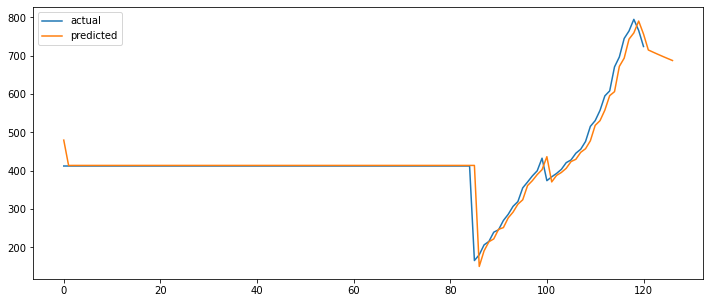

In [12]:
#Plotting the Actual and Predicted Values
plt.figure(figsize=(12,5))
plt.plot(y_to_train['fossil_cons_per_capita'].values,label='actual')
plt.plot(pred.values,label='predicted')
plt.legend()
plt.show()

In [13]:
#Forecasted data for Next Five Years
df_forecasted_fossil=pred.to_frame()
df_forecasted_fossil.columns=['consumption']
df_forecasted_fossil.index.names=['year']
df_forecasted_fossil.reset_index(level=0, inplace=True)
df2=df_forecasted_fossil[121:]

Text(0.5, 1.0, 'Forecasted Fossil energy consumption per capita')

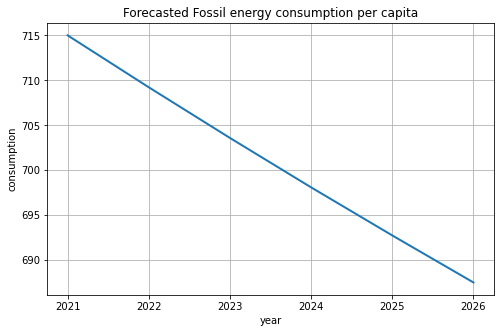

In [14]:
#Plotting thee forecasted data for Next Five Years
plt.figure(figsize=(8,5))
sns.lineplot(x='year',y='consumption',data=df2,linewidth=2)
plt.grid(True)
plt.title('Forecasted Fossil energy consumption per capita')

In [16]:
#Saving the Forecasted values as CSV
project.save_data(file_name = "Fossil_fuel_forecast.csv",data = df2.to_csv(index=False))

{'file_name': 'Fossil_fuel_forecast.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': '55129e66-7e2b-47a8-ac49-77450d72aaba'}

In [17]:
#Saving the Forecated values as JSON
project.save_data(file_name = "Fossil_fuel_forecast.json",data = df2.to_json())

{'file_name': 'Fossil_fuel_forecast.json',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': 'e070dec1-5f0e-48d2-bf20-e94b1c2b7e54'}

In [19]:
#Loading Renewable Energy Data

my_file_renew = project.get_file('india_data.csv')
my_file_renew.seek(0)
df_renew = pd.read_csv(my_file_renew,parse_dates=['year'],usecols=use_cols_renew,index_col=['year'])

df_renew.head()


,renewables_energy_per_capita
year,
1900-01-01,NaN
1901-01-01,NaN
1902-01-01,NaN
1903-01-01,NaN
1904-01-01,NaN


In [20]:
#Handling Missing Data
df_renew['renewables_energy_per_capita'].fillna((df_renew['renewables_energy_per_capita'].median()), inplace=True)

In [21]:
#Splitting Data for Training
y_renew_train = df_renew[:'2020-01-01']
y_renew_val = df_renew['2020-01-01':]

In [22]:
#ARIMA Model Training and Printing Summary Report
arima_renew= ARIMA(y_renew_train,order=(1,0,1))
model_renew=arima_renew.fit()
print (model_renew.summary())

                                   ARMA Model Results                                   
Dep. Variable:     renewables_energy_per_capita   No. Observations:                  121
Model:                               ARMA(1, 1)   Log Likelihood                -598.630
Method:                                 css-mle   S.D. of innovations             33.892
Date:                          Fri, 30 Jul 2021   AIC                           1205.261
Time:                                  09:45:11   BIC                           1216.444
Sample:                              01-01-1900   HQIC                          1209.803
                                   - 01-01-2020                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                225.8733     23.435      9.638      0.000    

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [24]:
#Making Predictions
pred_renew= model_renew.predict(end=len(y_renew_train)+5)


In [25]:
#Forecasting data for next 5 years
df_forecasted_renew=pred_renew.to_frame()
df_forecasted_renew.columns=['Renewable_consumption']
df_forecasted_renew.index.names=['year']
df_forecasted_renew.reset_index(level=0, inplace=True)
df_renew=df_forecasted_renew[121:]

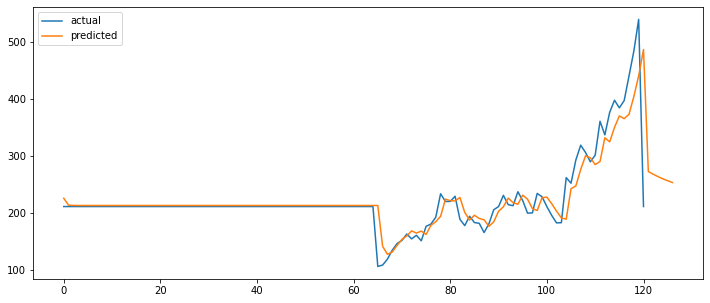

In [26]:
#Plot betwwn the actual data and Forecasted data
plt.figure(figsize=(12,5))
plt.plot(y_renew_train['renewables_energy_per_capita'].values,label='actual')
plt.plot(pred_renew.values,label='predicted')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Forecasted Renewable Energy consumption per capita')

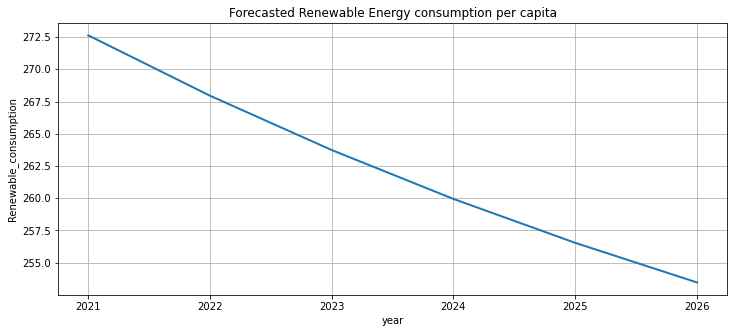

In [27]:
#Plotting predictions for next five years
plt.figure(figsize=(12,5))
sns.lineplot(x='year',y='Renewable_consumption',data=df_renew,linewidth=2)
plt.grid(True)
plt.title('Forecasted Renewable Energy consumption per capita')


In [28]:
#Saving Model as CSV
project.save_data(file_name = "Renewable_cons_forecast.csv",data = df_renew.to_csv(index=False))

{'file_name': 'Renewable_cons_forecast.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': '54810a98-9b5b-4041-93bc-505e0706f625'}

In [29]:
#Saving the model as JSON
project.save_data(file_name = "Renewable_cons_forecast.json",data = df_renew.to_json())

{'file_name': 'Renewable_cons_forecast.json',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': '85558570-4af9-414f-bbde-db955cfaebd2'}

In [30]:
#Loading CO2 data for Fossil Fuels
my_file_co2 = project.get_file('co2india.csv')
my_file_co2.seek(0)
df_reg = pd.read_csv(my_file_co2,usecols=use_cols_co2)

df_reg.head()

,year,co2_per_capita
0,1858,0.002
1,1859,0.003
2,1860,0.003
3,1861,0.002
4,1862,0.003


In [31]:
from sklearn import linear_model, metrics
reg = linear_model.LinearRegression()

In [32]:
reg.fit(df_reg[['year']],df_reg.co2_per_capita)

LinearRegression()

In [96]:
co2_reg

LinearRegression()

In [54]:
#Creating Prediction data
list_year=[2021,2022,2023,2024,2025]
df_co2=pd.DataFrame(list_year)
df_co2.columns= ['year']

In [55]:
df_co2

,year
0,2021
1,2022
2,2023
3,2024
4,2025


In [56]:
#Predictions done on data
df_co2['CO2_pred']=reg.predict(df_co2)

In [57]:
df_co2

,year,CO2_pred
0,2021,1.020049
1,2022,1.028451
2,2023,1.036853
3,2024,1.045255
4,2025,1.053656


Text(0.5, 1.0, 'Forecasted CO2 Emission per capita')

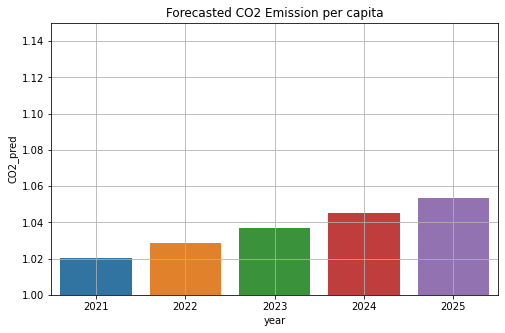

In [58]:
#Plotting the Predictions
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='CO2_pred',data=df_co2,linewidth=2)
plt.grid(True)
plt.ylim(1.00,1.15)
plt.title('Forecasted CO2 Emission per capita')

In [60]:
#Saving Predictions as CSV
project.save_data(file_name = "Co2_fossil_forecast.csv",data = df_co2.to_csv(index=False))

{'file_name': 'Co2_fossil_forecast.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': 'b26f05c9-2121-4005-96a6-e4a811ba9439'}

In [61]:
#Saving Predictions as JSON
project.save_data(file_name = "Co2_fossil_forecast.json",data = df_co2.to_json())

{'file_name': 'Co2_fossil_forecast.json',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': '427064ef-e2e0-44e9-b836-7e0390bce54a'}

In [ ]:
#############################################Germany ###############################################################################################

In [66]:
use_cols_fossil_ger=['year','fossil_cons_per_capita']
use_cols_renew_ger=['year','renewables_energy_per_capita']

In [69]:
my_file_ger = project.get_file('Germany_data.csv')
my_file_ger.seek(0)
df_reg_ger = pd.read_csv(my_file_ger,usecols=use_cols_fossil_ger)

df_reg_ger.head(10)

,year,fossil_cons_per_capita
0,1900,NaN
1,1901,NaN
2,1902,NaN
3,1903,NaN
4,1904,NaN
5,1905,NaN
6,1906,NaN
7,1907,NaN
8,1908,NaN
9,1909,NaN


In [70]:
df_reg_ger

,year,fossil_cons_per_capita
0,1900,NaN
1,1901,NaN
2,1902,NaN
3,1903,NaN
4,1904,NaN
...,...,...
116,2016,4507.63
117,2017,4296.02
118,2018,4048.17
119,2019,3429.24


In [71]:
df_reg_ger.dropna(inplace=True)

In [73]:
reg_ger = linear_model.LinearRegression()

In [74]:
reg_ger.fit(df_reg_ger[['year']],df_reg_ger.fossil_cons_per_capita)

LinearRegression()

In [81]:
list2=[2021,2022,2023,2024,2025]
df_fossil_ger=pd.DataFrame(list2)
df_fossil_ger.columns= ['year']
df_fossil_ger

,year
0,2021
1,2022
2,2023
3,2024
4,2025


In [82]:
df_fossil_ger['Fossil_pred']=reg_ger.predict(df_fossil_ger)

In [83]:
df_fossil_ger

,year,Fossil_pred
0,2021,4276.030968
1,2022,4267.588979
2,2023,4259.146989
3,2024,4250.704999
4,2025,4242.263009


Text(0.5, 1.0, 'Forecasted Fossil Fuel Consumption per capita')

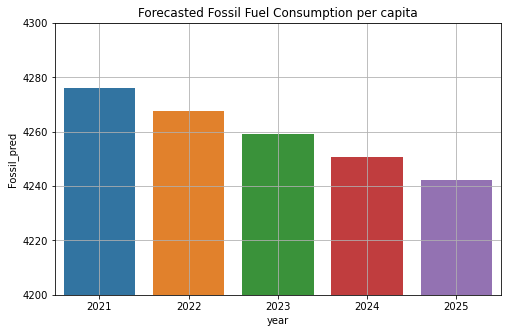

In [86]:
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='Fossil_pred',data=df_fossil_ger,linewidth=2)
plt.grid(True)
plt.ylim(4200,4300)
plt.title('Forecasted Fossil Fuel Consumption per capita')

In [99]:
project.save_data(file_name = "Fossil_forecast_germany.csv",data = df_fossil_ger.to_csv(index=False))

{'file_name': 'Fossil_forecast_germany.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': '8aba2d6c-a5df-4fb1-870a-11175467a720'}

In [100]:
project.save_data(file_name = "Fossil_forecast_germany.json",data = df_fossil_ger.to_json())

{'file_name': 'Fossil_forecast_germany.json',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': '88b12e1d-ca37-4f7d-ad79-fbf747daaf52'}

In [87]:
my_file_ger_renew = project.get_file('Germany_data.csv')
my_file_ger_renew.seek(0)
df_renew_ger = pd.read_csv(my_file_ger_renew,usecols=use_cols_renew_ger,parse_dates=['year'],index_col=['year'])

df_renew_ger.head(10)

,renewables_energy_per_capita
year,
1900-01-01,NaN
1901-01-01,NaN
1902-01-01,NaN
1903-01-01,NaN
1904-01-01,NaN
1905-01-01,NaN
1906-01-01,NaN
1907-01-01,NaN
1908-01-01,NaN


In [88]:
df_renew_ger.isna().sum()

renewables_energy_per_capita    66
dtype: int64

In [89]:
df_renew_ger

,renewables_energy_per_capita
year,
1900-01-01,NaN
1901-01-01,NaN
1902-01-01,NaN
1903-01-01,NaN
1904-01-01,NaN
...,...
2016-01-01,6184.38
2017-01-01,6928.75
2018-01-01,7119.75


In [90]:
df_renew_ger['renewables_energy_per_capita'].fillna((df_renew_ger['renewables_energy_per_capita'].median()), inplace=True)

In [91]:
y_renew_train_ger = df_renew_ger[:'2020-01-01']

In [92]:
arima_renew_ger= ARIMA(y_renew_train_ger,order=(1,0,1))
model_renew_ger=arima_renew_ger.fit()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [93]:
pred_renew_ger= model_renew_ger.predict(end=len(y_renew_train)+5)

In [96]:
pred_renew_ger

year
1900-01-01    1219.044171
1901-01-01     817.654250
1902-01-01     818.842653
1903-01-01     818.806990
1904-01-01     818.808032
                 ...     
2022-01-01     700.516427
2023-01-01     755.968845
2024-01-01     805.491069
2025-01-01     849.717284
2026-01-01     889.213858
Freq: AS-JAN, Length: 127, dtype: float64

In [95]:
df_forecasted_renew_ger=pred_renew_ger.to_frame()
df_forecasted_renew_ger.columns=['Renewable_consumption']
df_forecasted_renew_ger.index.names=['year']
df_forecasted_renew_ger.reset_index(level=0, inplace=True)
df_renew_ger=df_forecasted_renew_ger[121:]

Text(0.5, 1.0, 'Forecasted Renewable Energy consumption per capita')

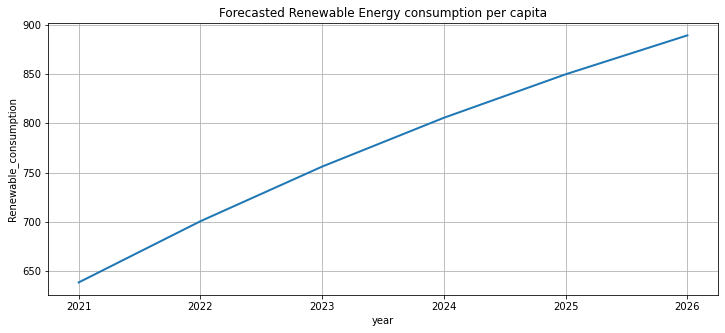

In [97]:
plt.figure(figsize=(12,5))
sns.lineplot(x='year',y='Renewable_consumption',data=df_renew_ger,linewidth=2)
plt.grid(True)
plt.title('Forecasted Renewable Energy consumption per capita')

In [98]:
project.save_data(file_name = "Renewable_cons_forecast_germany.csv",data = df_renew_ger.to_csv(index=False))

{'file_name': 'Renewable_cons_forecast_germany.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': 'f3653827-7021-4d0b-9026-0425420f17a0'}

In [101]:
project.save_data(file_name = "Renewable_cons_forecast_germany.json",data = df_renew_ger.to_json())

{'file_name': 'Renewable_cons_forecast_germany.json',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': 'f13370c3-9f97-4d28-92ce-ea0592f63b51'}

In [104]:
use_cols_co2_ger=['year','co2_per_capita']

In [106]:

my_file_ger_co2 = project.get_file('co2_germany_data.csv')
my_file_ger_co2.seek(0)
df_co2_ger = pd.read_csv(my_file_ger_co2,usecols=use_cols_co2_ger)

df_co2_ger.head(10)
             

,year,co2_per_capita
0,1792,NaN
1,1793,NaN
2,1794,NaN
3,1795,NaN
4,1796,NaN
5,1797,NaN
6,1798,NaN
7,1799,NaN
8,1800,0.035
9,1801,0.023


In [107]:
df_co2_ger.isna().sum()

year              0
co2_per_capita    8
dtype: int64

In [108]:
df_co2_ger['co2_per_capita'].fillna((df_co2_ger['co2_per_capita'].median()), inplace=True)

In [109]:
reg_ger_co2 = linear_model.LinearRegression()
reg_ger_co2.fit(df_co2_ger[['year']],df_co2_ger.co2_per_capita)

LinearRegression()

In [111]:
list2=[2021,2022,2023,2024,2025]
df_ger_co2=pd.DataFrame(list2)
df_ger_co2.columns= ['year']
df_ger_co2

,year
0,2021
1,2022
2,2023
3,2024
4,2025


In [112]:
df_ger_co2['CO2_pred']=reg_ger_co2.predict(df_ger_co2)

In [113]:
df_ger_co2

,year,CO2_pred
0,2021,13.024530
1,2022,13.086671
2,2023,13.148811
3,2024,13.210951
4,2025,13.273091


Text(0.5, 1.0, 'Forecasted CO2 Emission per capita')

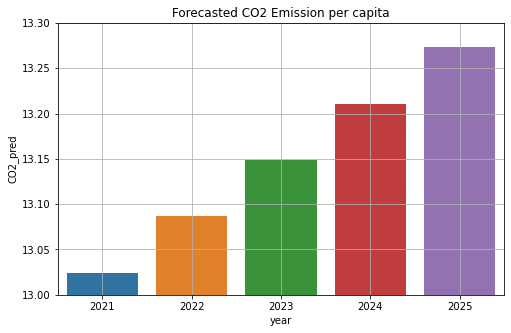

In [114]:
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='CO2_pred',data=df_ger_co2,linewidth=2)
plt.grid(True)
plt.ylim(13.00,13.30)
plt.title('Forecasted CO2 Emission per capita')

In [115]:
project.save_data(file_name = "CO2_forecast_germany.csv",data = df_ger_co2.to_csv(index=False))

{'file_name': 'CO2_forecast_germany.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': 'cee06335-963a-48cb-a668-b94abbf6b136'}

In [116]:
project.save_data(file_name = "CO2_forecast_germany.json",data = df_ger_co2.to_json())

{'file_name': 'CO2_forecast_germany.json',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': '937c2a6d-0fb1-42fa-8e37-a102fd90ea7c'}